# Milk Quality Prediction with Machine Learning (Classification)

### Data Preparation

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [48]:
milkdata = pd.read_csv("csv/milknew.csv")

In [50]:
milkdata.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [52]:
milkdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [54]:
milkdata.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [56]:
milkdata.shape

(1059, 8)

In [58]:
milkdata.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


### Data Cleaning

In [61]:
milkdata['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [65]:
milkdata.isna().any()

pH            False
Temprature    False
Taste         False
Odor          False
Fat           False
Turbidity     False
Colour        False
Grade         False
dtype: bool

### Exploratory Data Analysis (EDA)

<Axes: >

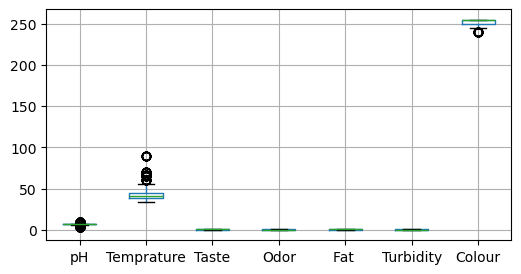

In [103]:
plt.figure(figsize=(6,3))
milkdata.boxplot()

Text(0.5, 1.0, 'Grade versus Colour')

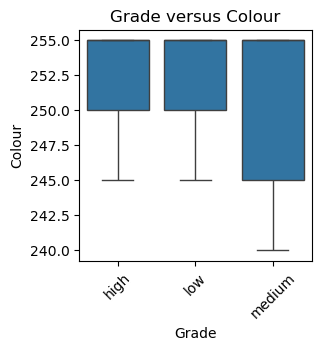

In [97]:
plt.figure(figsize = (3, 3))
ax = sns.boxplot(x='Grade', y='Colour', data=milkdata)
plt.setp(ax.artists, alpha=.6, linewidth=3, edgecolor="l")
plt.xticks(rotation=45)
plt.title('Grade versus Colour')

Text(0.5, 1.0, 'Grade versus Turbidity')

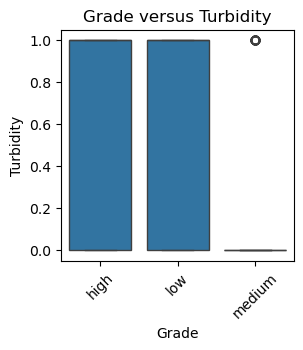

In [93]:
plt.figure(figsize = (3, 3))
ax = sns.boxplot(x='Grade', y='Turbidity', data=milkdata)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Grade versus Turbidity')

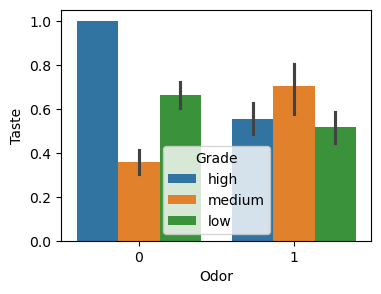

In [81]:
plt.figure(figsize=(4,3))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=milkdata)
plt.show()

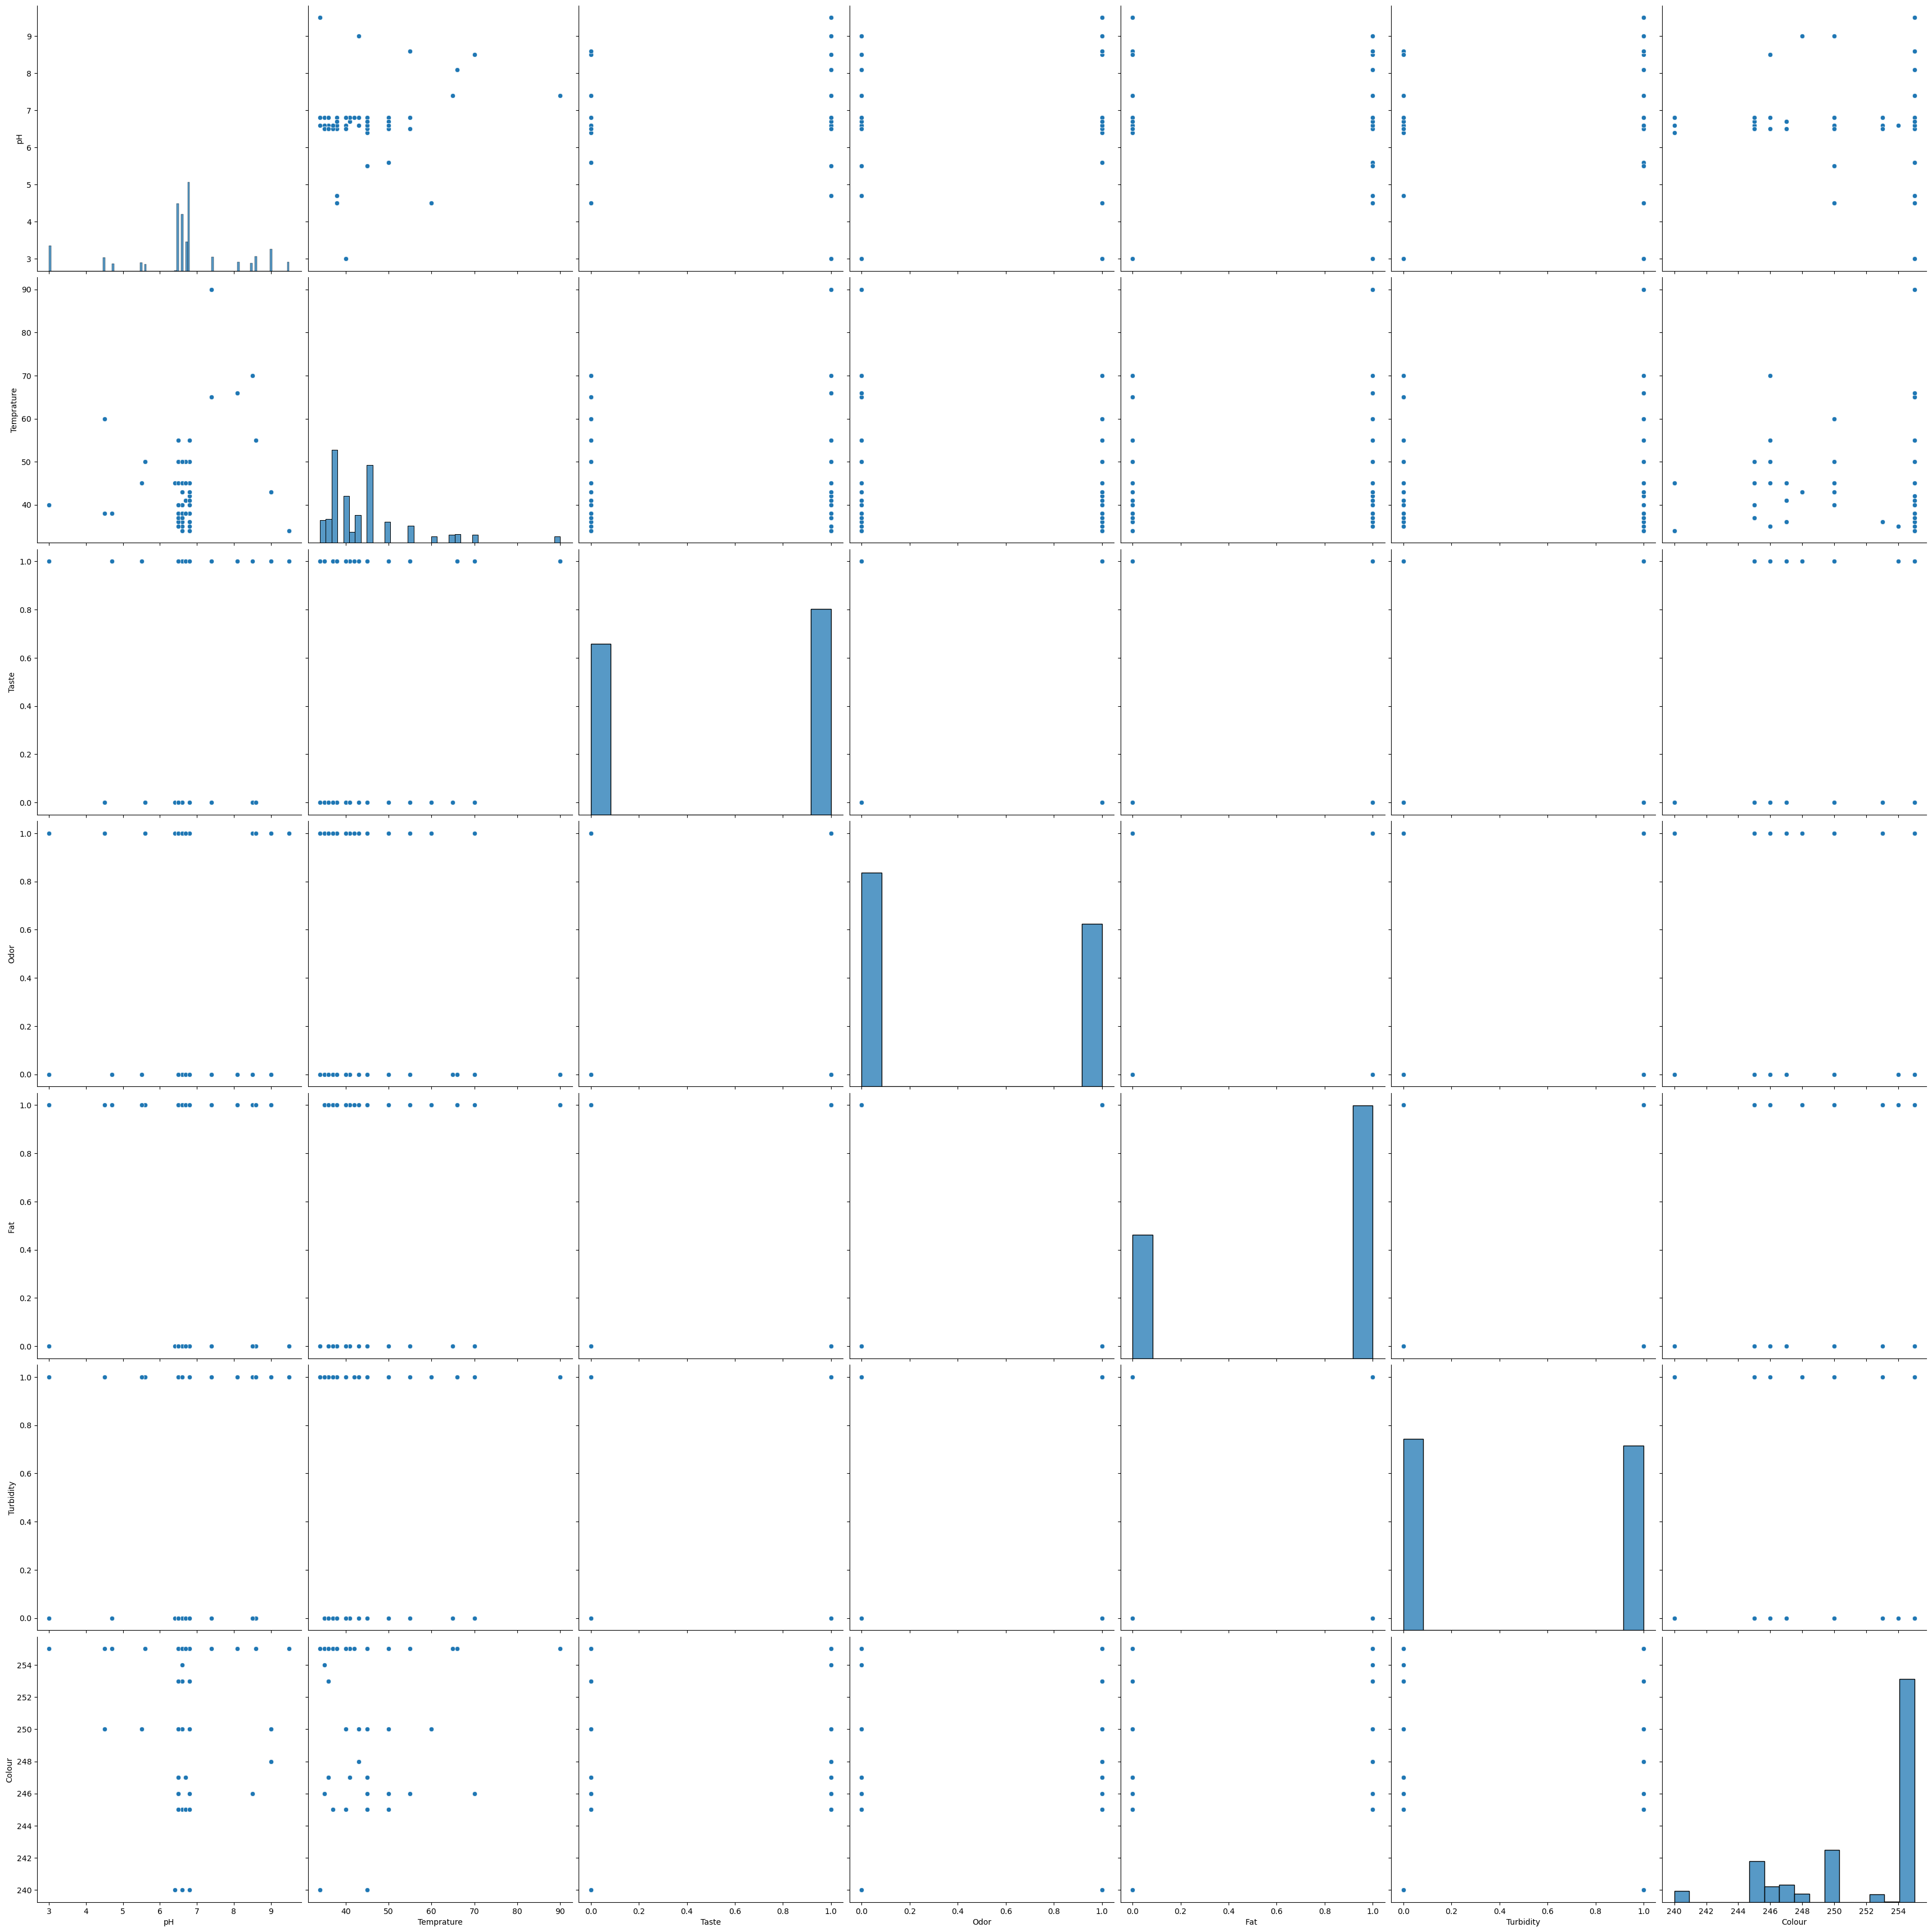

In [105]:
sns.pairplot(milkdata,height=5)

## Data Preparation

In [112]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
milkdata['Grade']= label_encoder.fit_transform(milkdata['Grade'])
  
milkdata['Grade'].unique()

array([0, 1, 2], dtype=int64)

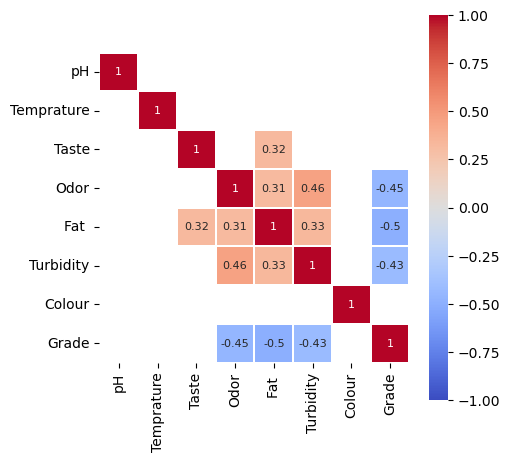

In [130]:
corr = milkdata.corr() 
plt.figure(figsize=(5, 5))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

In [133]:
X = milkdata[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y = milkdata[['Grade']]

In [138]:
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and Testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(741, 7)
(741, 1)
(318, 7)
(318, 1)


## Model Building

### Decision tree

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Membuat dan melatih model Decision Tree
dtmodel = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

# Melakukan prediksi
dt_predictions = dtmodel.predict(X_test)

# Membuat confusion matrix
coma = confusion_matrix(y_test, dt_predictions)

# Menghitung akurasi
score = accuracy_score(y_test, dt_predictions)

# Memanggil output
print("Confusion Matrix:")
print(coma)
print("\nAccuracy Score:")
print(score)


Confusion Matrix:
[[  0   0  76]
 [  0  87  28]
 [  0   0 127]]

Accuracy Score:
0.6729559748427673


### Support Vector Machine

In [164]:
# SVM classifier
from sklearn.svm import SVC

# Melatih model SVM dengan kernel linear
svm_model_linear = SVC(kernel='linear', C=1).fit(X_train, y_train)

# Melakukan prediksi
svm_predictions = svm_model_linear.predict(X_test)

# Menghitung akurasi model untuk X_test
accuracy = svm_model_linear.score(X_test, y_test)

# Membuat confusion matrix
coma = confusion_matrix(y_test, svm_predictions)

# Memanggil output
print("Confusion Matrix:")
print(coma)
print("\nAccuracy Score:")
print(accuracy)


Confusion Matrix:
[[ 70   3   3]
 [ 15  98   2]
 [ 14   8 105]]

Accuracy Score:
0.8584905660377359


### KNN

In [166]:
# Melatih model KNN dengan 7 tetangga terdekat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

# Menghitung akurasi model untuk X_test
accuracy = knn.score(X_test, y_test)

# Membuat confusion matrix
knn_predictions = knn.predict(X_test)
coma = confusion_matrix(y_test, knn_predictions)


print("\nConfusion Matrix:")
print(coma)
print("Accuracy Score:")
print(accuracy)



Confusion Matrix:
[[ 69   0   7]
 [  1 112   2]
 [  0   0 127]]
Accuracy Score:
0.9685534591194969


### Naive Baiyes

In [170]:
# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Melatih model Naive Bayes
nb = GaussianNB().fit(X_train, y_train)

# Melakukan prediksi
nb_predictions = nb.predict(X_test)

# Menghitung akurasi model untuk X_test
accuracy = nb.score(X_test, y_test)

# Membuat confusion matrix
coma = confusion_matrix(y_test, nb_predictions)

print("\nConfusion Matrix:")
print(coma)
print("Accuracy Score:")
print(accuracy)



Confusion Matrix:
[[ 64   0  12]
 [  5 108   2]
 [  5   7 115]]
Accuracy Score:
0.9025157232704403


### Simple Predictions

In [206]:
# Data baru yang ingin diprediksi 
new_data = [[9, 1.5, 0, 0, 0, 0, 90]]  # Gantilah dengan data yang sesuai

# Melakukan prediksi dengan model KNN
new_prediction = dtmodel.predict(new_data)

print("Prediksi Kualitas Susu:", new_prediction[0])

Prediksi Kualitas Susu: 1


In [186]:
predictions1 = nb.predict(np.array([[0,0,0,1,3,0,20]]))
predictions1

array([2], dtype=int64)

In [208]:
from sklearn.model_selection import GridSearchCV

# Contoh untuk model Decision Tree
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 8, 'min_samples_split': 2}


In [212]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTreeClassifier(max_depth=4), X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.90604027 0.87837838 0.89189189 0.90540541 0.91891892]
Mean accuracy: 0.9001269726101941
